In [1]:
import torch
import json
import numpy as np
import os
import matplotlib.pyplot as plt

import ml_helper

# TODO: 
- clean and refactor maybe ml_plot.py whith plot functions

In [2]:
# load newest model
path = 'models/'
model_path = ml_helper.get_newest_model_path(path)
print("Loading model from: ", model_path)
model = torch.load(model_path)

# load history
history_path = ml_helper.get_newest_model_path(path, name="history", extension=".json")
print("Loading history from: ", history_path)
with open(history_path) as f:
    history = json.load(f)

# load hyperparameters
hyperparameters_path = ml_helper.get_newest_model_path(path, name="para", extension=".json")
print("Loading hyperparameters from: ", hyperparameters_path)
with open(hyperparameters_path) as f:
    params = json.load(f)

Loading model from:  models/transformer_acc_0.5056_20250127-061459.pth


C:\Users\felix\AppData\Local\Temp\ipykernel_5648\1644685603.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path)


Loading history from:  models/transformer_history_20250127-061459.json
Loading hyperparameters from:  models/transformer_para_acc_0.5056_20250127-061459.json


In [3]:
# print history
print("History:")
print(json.dumps(history, indent=4))

History:
{
    "loss": [
        0.6977859839254063,
        0.6934245683644947,
        0.6932587604291043
    ],
    "train_acc": [
        0.5086032388663968,
        0.5080971659919028,
        0.5063259109311741
    ],
    "val_acc": [
        0.5093117408906882,
        0.5093117408906882,
        0.5093117408906882
    ]
}


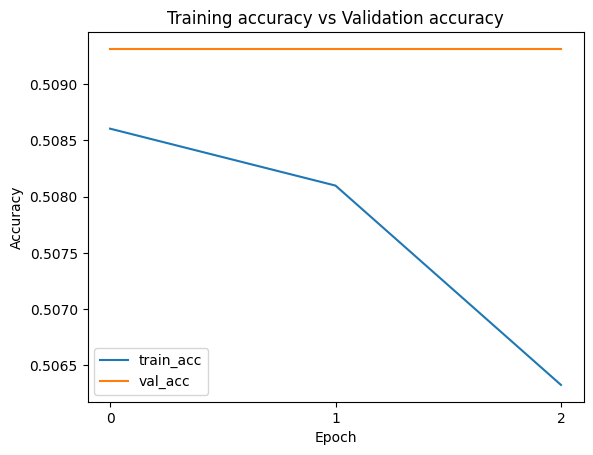

In [4]:
# plot training accuracy vs validation accuracy
plt.plot(history['train_acc'], label='train_acc')
plt.plot(history['val_acc'], label='val_acc')
plt.legend()
plt.title('Training accuracy vs Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# set y-axis limits to 0-1
#plt.ylim(0, 1)
# set x-axis limits to integer steps
plt.xticks(np.arange(0, len(history['train_acc']), 1))
plt.show()

In [5]:
import pandas as pd

# Load the data from csv
df = pd.read_csv('data/hack.csv')
print(df.shape)

(8000, 6)


In [6]:
# Load the data
data_path = 'data/idx_based_padded'

train_dataset = torch.load(data_path + '/train.pt')
test_dataset = torch.load(data_path + '/test.pt') 
val_dataset = torch.load(data_path + '/val.pt')

C:\Users\felix\AppData\Local\Temp\ipykernel_5648\4202493223.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_dataset = torch.load(data_path + '/train.pt')
C:\Users\

{False: 2001, True: 1944}


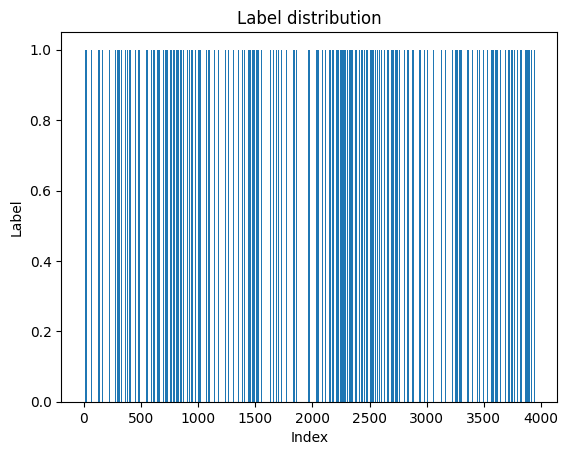

In [19]:
# count train_dataset labels
train_labels = train_dataset.labels
unique, counts = np.unique(train_labels, return_counts=True)
print(dict(zip(unique, counts)))

idx_range = range(0, len(train_dataset))
# plot label distribution
plt.bar(idx_range, train_labels)
plt.title('Label distribution')
plt.xlabel('Index')
plt.ylabel('Label')
plt.show()

- If distribution wouldnt be random it could screw up the training process

In [7]:
print(train_dataset.original_indices)

[4679, 52, 2818, 1536, 1298, 3516, 6809, 6992, 5134, 7257, 496, 3880, 3045, 4945, 839, 3997, 2611, 7456, 5910, 599, 788, 7284, 294, 335, 4183, 645, 2612, 4222, 7133, 3622, 6766, 491, 6704, 3430, 6220, 1581, 271, 7851, 2748, 1366, 4286, 7612, 342, 7038, 1094, 896, 1755, 5683, 1095, 289, 6574, 7860, 7906, 6832, 444, 1738, 6571, 685, 464, 1684, 854, 5436, 299, 3441, 6199, 3797, 430, 6532, 6440, 3413, 5855, 173, 2945, 356, 1018, 1854, 6855, 3825, 1288, 6152, 735, 7049, 879, 2335, 6883, 321, 4095, 631, 6182, 3383, 7615, 4858, 2577, 7149, 1054, 1142, 2302, 7068, 3858, 3917, 4300, 504, 1994, 7161, 175, 1570, 4595, 5265, 7998, 2438, 7450, 3427, 5411, 7241, 2795, 2970, 6584, 6375, 3074, 6945, 4783, 4079, 3703, 7331, 4521, 5268, 2222, 3474, 1286, 3590, 1965, 2323, 1424, 2614, 5417, 118, 6754, 7114, 4898, 4767, 7341, 7314, 6039, 3560, 4557, 2651, 787, 7785, 4139, 3731, 7227, 3318, 2322, 6021, 3783, 1005, 7629, 2604, 5006, 7349, 3252, 5405, 1421, 4297, 1712, 3230, 570, 7472, 1921, 2500, 2400, 2716

In [8]:
print(params)

{'max_len': 280, 'vocab_size': 10556, 'embed_dim': 100, 'num_heads': 2, 'num_layers': 2, 'hidden_dim': 256, 'epochs': 3, 'batch_size': 8, 'learning_rate': 2e-05, 'accuracy': 0.5056}


In [9]:
import transformer_1b

model = transformer_1b.TransformerBinaryClassifier(params['vocab_size'], params['embed_dim'], 
                                     params['num_heads'], params['num_layers'], 
                                     params['hidden_dim'])

model.load_state_dict(torch.load(model_path))


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

predictions = []
labels = []

# Predict on test set
model.eval()
with torch.no_grad():
    data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
    for batch in data_loader:
        input_ids = batch['input_ids'].to(device)
        labels_batch = batch['labels'].unsqueeze(1).to(device)
        outputs = model(input_ids)
        outputs = outputs.cpu().round().numpy()
        labels_batch = labels_batch.cpu().numpy()

        predictions.append(outputs)
        labels.append(labels_batch)

# Concatenate all predictions
predictions = np.concatenate(predictions)
labels = np.concatenate(labels)

c:\Users\felix\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
C:\Users\felix\AppData\Local\Temp\ipykernel_5648\3082896325.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user 

In [10]:
# get df data for original indices
df_test = df.iloc[test_dataset.original_indices].copy()
df_test['prediction'] = predictions
df_test['label'] = labels
df_test['pred_correct'] = (df_test['prediction'] == df_test['label'])

df_test_sorted = df_test.sort_values(by='humor_rating').reset_index(drop=True)


997


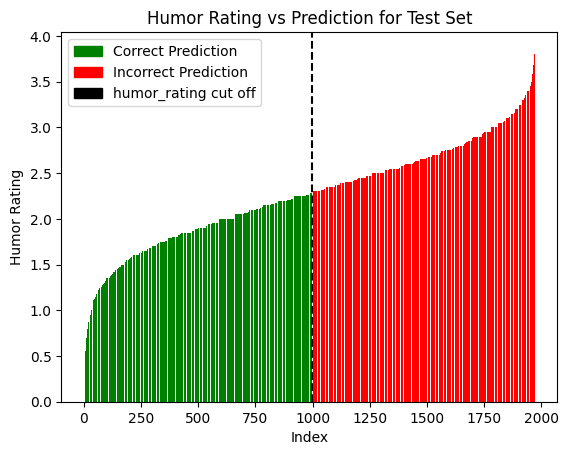

In [11]:
from matplotlib import patches as mpatches

median_rating = df['humor_rating'].median()
# get first index where humor_rating is greater than median_rating
median_idx = df_test_sorted[df_test_sorted['humor_rating'] > median_rating].index[0]
print(median_idx)
# range idx for len df_test
range_idx = range(len(df_test))
colors = df_test_sorted['pred_correct'].map({True: 'g', False: 'r'})
# bar plot for each df_test humor_rating value 
plt.bar(range_idx, df_test_sorted['humor_rating'], color=colors)
# vertical line for True/False cut off
plt.axvline(x=median_idx, color='black', linestyle='--')
# Create a legend handles
green_patch = mpatches.Patch(color='g', label='Correct Prediction')
red_patch = mpatches.Patch(color='r', label='Incorrect Prediction')
line_patch = mpatches.Patch(color='black', label='humor_rating cut off')
plt.title('Humor Rating vs Prediction for Test Set')
plt.xlabel('Index')
plt.ylabel('Humor Rating')
plt.legend(handles=[green_patch, red_patch, line_patch])
plt.show()

# NOTE: 
- model currently only predicts 0 therefore one site is green and other red
- plot can be helpfull to identify if around the cut off the model gets confused